# Prepare a classification model using Naive Bayes for salary data
---

## Data Description:

Feature | Description
:-: | :-:
age | age of a person
workclass | A work class is a grouping of work 
education | Education of an individuals	
maritalstatus | Marital status of an individulas	
occupation | occupation of an individuals
relationship | familial relationship status
race | Race of an Individual
sex | Gender of an Individual
capitalgain | profit received from the sale of an investment	
capitalloss | A decrease in the value of a capital asset
hoursperweek | number of hours work per week	
native | Native country of an individual
Salary | salary of an individual

## Data Collection

We have been given seperate datasets for training and testing. We will load both and perform the same operations on both so that they have the same kind of features

In [1]:
# Importing pandas for handling data
import pandas as pd

In [2]:
# Loading training data
train = pd.read_csv("SalaryData_Train.csv")
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Loading testing data
test = pd.read_csv("SalaryData_Test.csv")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Data Preparation

### Data Exploration

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


There are no na values, for nearly 30 Thousand entries, and 14 features. We have to create a model to predict salary class

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


Same for testing data, which has nearly 15 Thousand entries

In [6]:
train.select_dtypes('object').nunique()

workclass         7
education        16
maritalstatus     7
occupation       14
relationship      6
race              5
sex               2
native           40
Salary            2
dtype: int64

In [7]:
test.select_dtypes('object').nunique()

workclass         7
education        16
maritalstatus     7
occupation       14
relationship      6
race              5
sex               2
native           40
Salary            2
dtype: int64

We can confirm that train and test data have the same number of classes for each categorical feature

In [8]:
# Getting unique values for each feature
train.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

age, capitalgain, capitalloss, hoursperweek seem to be continuous features. The rest have very few unique values and most probably are categorical

<Axes: xlabel='age', ylabel='Count'>

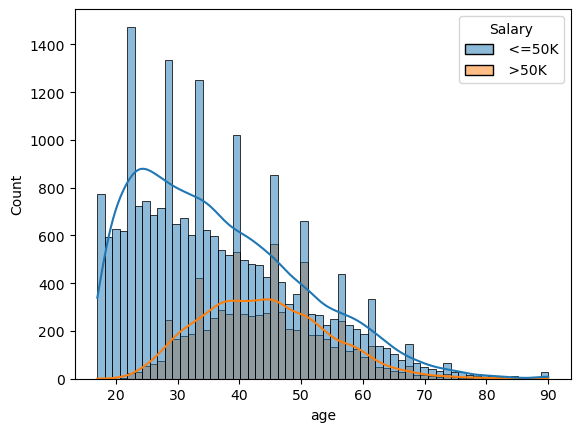

In [9]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for age for both types of salary values
sns.histplot(train, x = 'age', hue = 'Salary', kde = True)

<Axes: xlabel='age', ylabel='Count'>

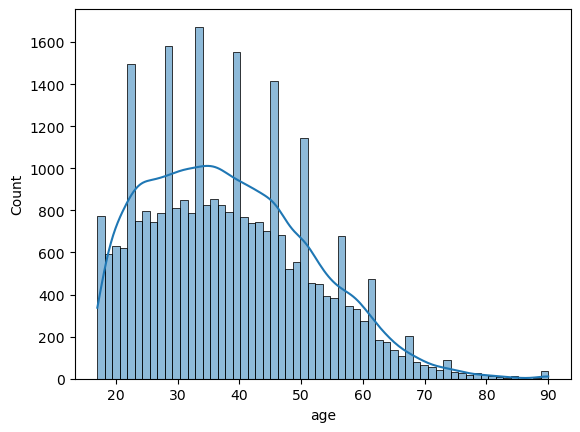

In [10]:
sns.histplot(train, x = 'age', kde = True)

We have a right-skewed data here

In [11]:
# Value counts for workclass
train.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

<Axes: xlabel='count', ylabel='workclass'>

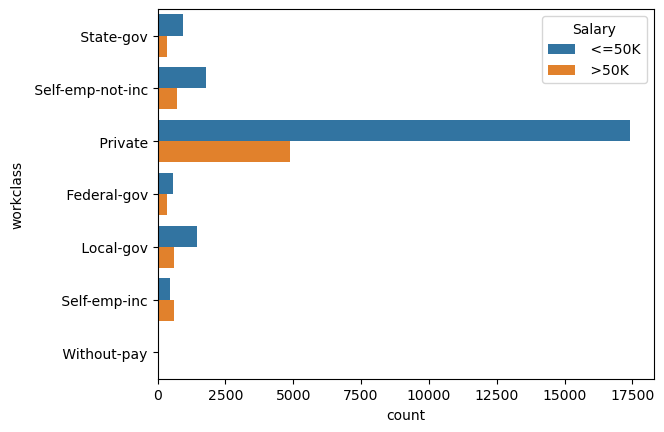

In [12]:
# Countplot for workclass for both Salary values
sns.countplot(train, y = 'workclass', hue = 'Salary')

In [13]:
# Value counts for education
train.education.value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [14]:
# Value counts for educationno
train.educationno.value_counts()

9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64

<Axes: xlabel='count', ylabel='education'>

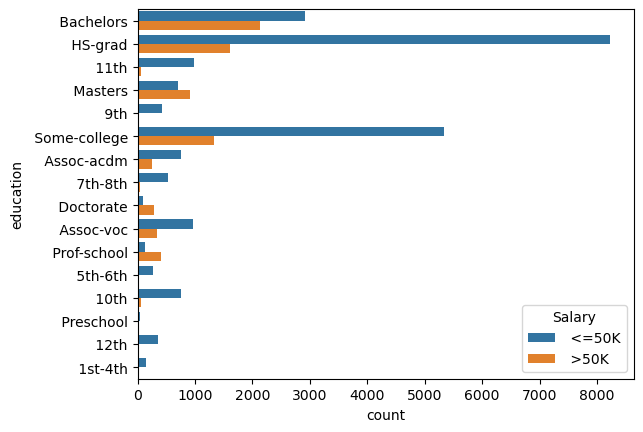

In [15]:
# Countplot for education for each value of Salary
sns.countplot(train, y = 'education', hue = 'Salary')

education and educationno have a one to one mapping where education contains a descriptor for the qualification and educationno contains a grade level for the descriptor. We can remove either depending upon the naive bayes classification model we will use

In [16]:
# Value counts for maritalstatus
train.maritalstatus.value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

<Axes: xlabel='count', ylabel='maritalstatus'>

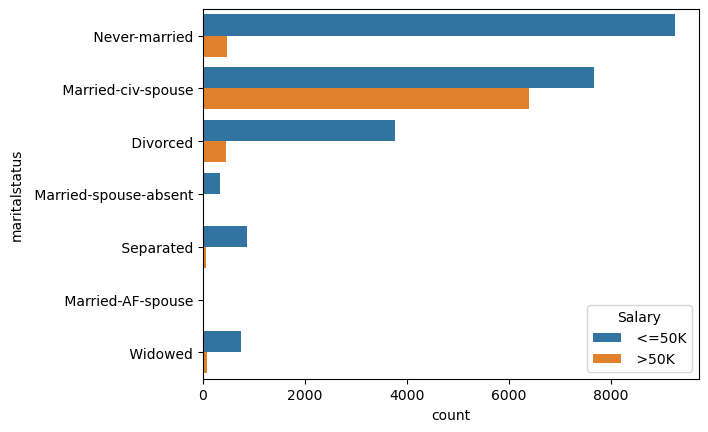

In [17]:
# Count plot for maritalstatus for both values of Salary
sns.countplot(train, y = 'maritalstatus', hue = 'Salary')

In [18]:
# Value counts for occupation
train.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

<Axes: xlabel='count', ylabel='occupation'>

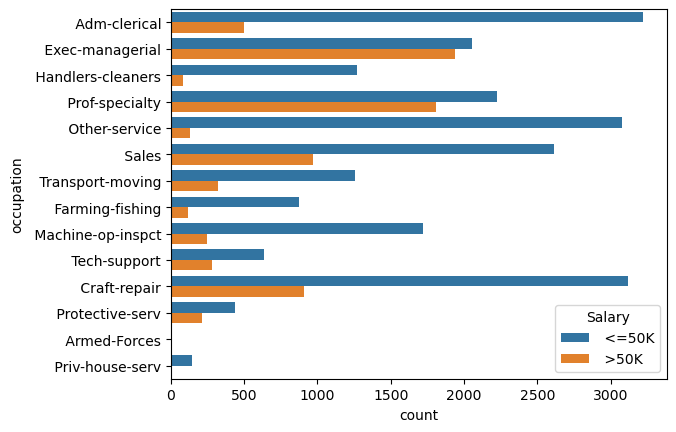

In [19]:
# Countplot for occupation for both values of Salary
sns.countplot(train, y = 'occupation', hue = 'Salary')

In [20]:
# Value counts for relationship
train.relationship.value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

<Axes: xlabel='count', ylabel='relationship'>

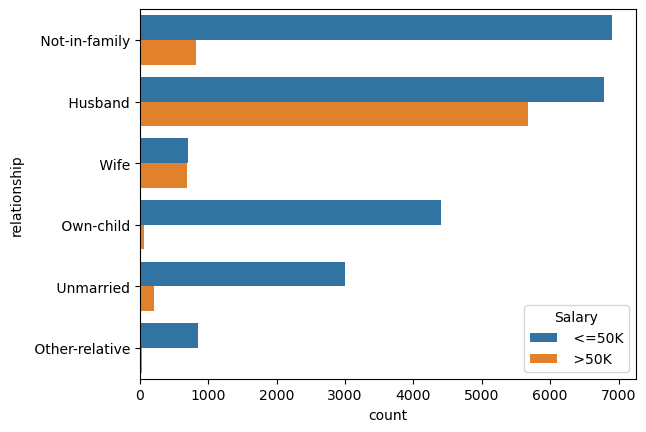

In [21]:
# Countplot for relationship for both values of Salary
sns.countplot(train, y = 'relationship', hue = 'Salary')

In [22]:
# Value counts for race
train.race.value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

<Axes: xlabel='count', ylabel='race'>

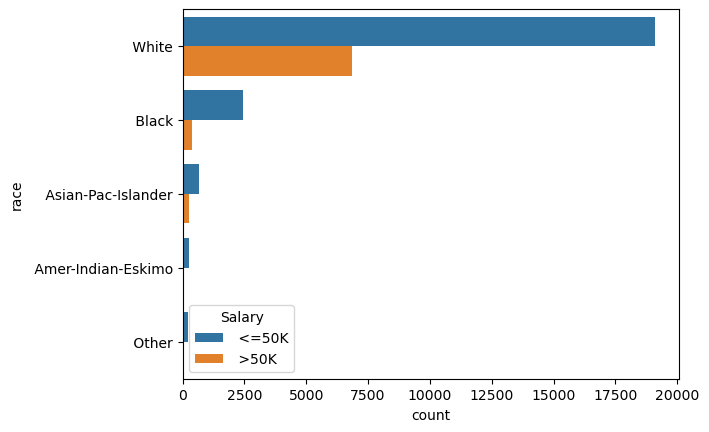

In [23]:
# Countplot for race for both values of Salary
sns.countplot(train, y = 'race', hue = 'Salary')

In [24]:
# Value counts for sex
train.sex.value_counts()

 Male      20380
 Female     9781
Name: sex, dtype: int64

<Axes: xlabel='count', ylabel='sex'>

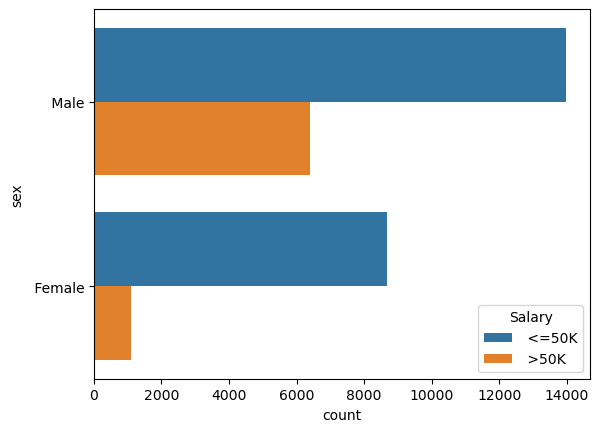

In [25]:
# Countplot for sex for both values of Salary
sns.countplot(train, y = 'sex', hue = 'Salary')

<Axes: xlabel='capitalgain', ylabel='Count'>

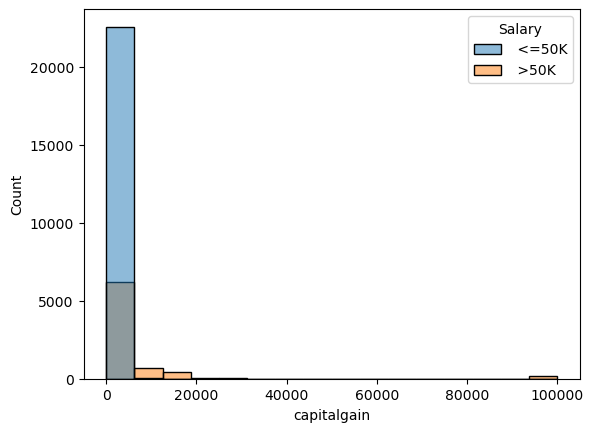

In [26]:
# Histogram for capitalgain for both values of Salary
sns.histplot(train, x = 'capitalgain', hue = 'Salary')

<Axes: xlabel='capitalgain', ylabel='Count'>

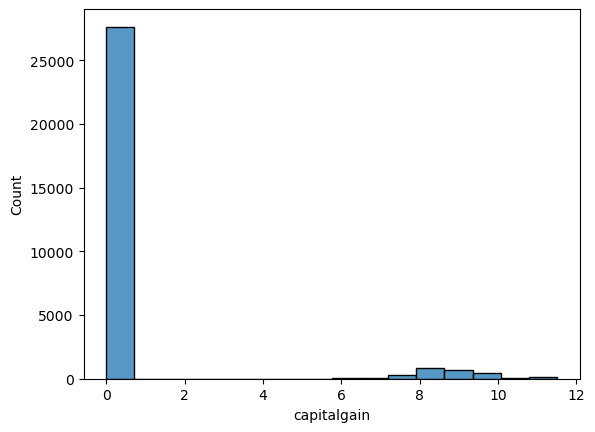

In [27]:
# Importing library for numeric operations
import numpy as np

# Histogram for capitalgain after apply log transformation on it
sns.histplot(x = np.log(train.capitalgain + 1))

Applying log transformation does not help as there is a disproportionate number of 0 values for the feature

<Axes: xlabel='capitalgain', ylabel='Count'>

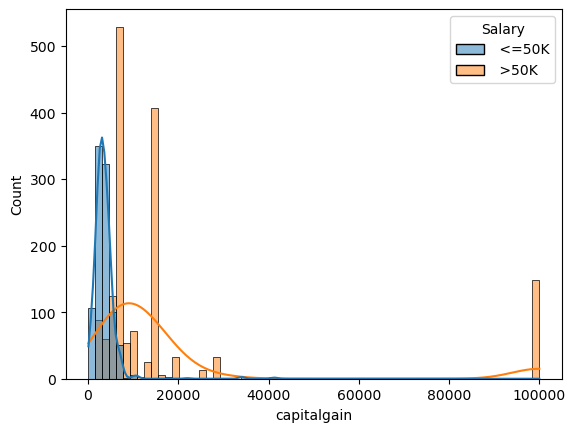

In [28]:
# Histogram for capitalgain greater than 0 for both values of Salary
sns.histplot(train[train.capitalgain > 0], x = 'capitalgain', hue = 'Salary', kde = True)

Most records have no or low capital gain

<Axes: ylabel='Frequency'>

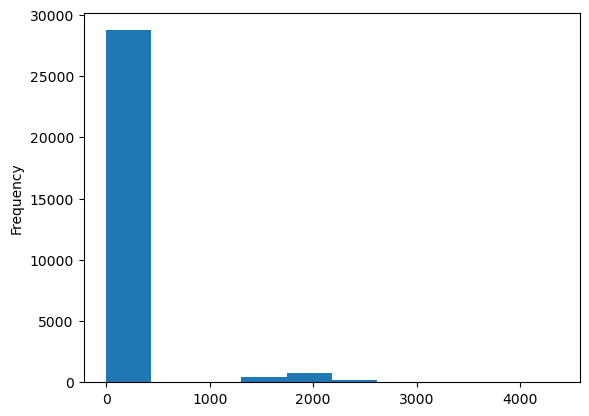

In [29]:
# Histogram for capitalloss
train.capitalloss.plot(kind = 'hist')

<Axes: xlabel='capitalloss', ylabel='Count'>

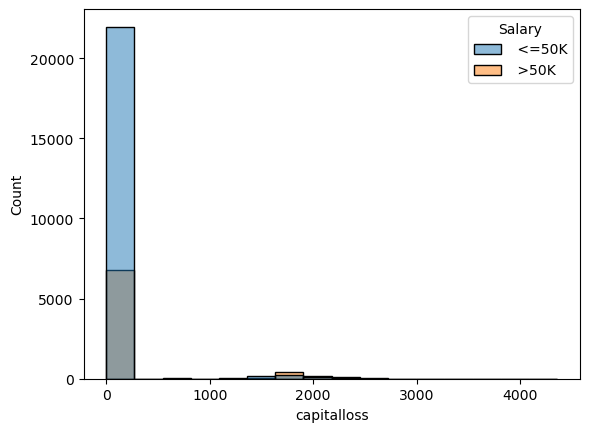

In [30]:
# Histogram for capitalloss for both values of Salary
sns.histplot(train, x = 'capitalloss', hue = 'Salary')

<Axes: xlabel='capitalloss', ylabel='Count'>

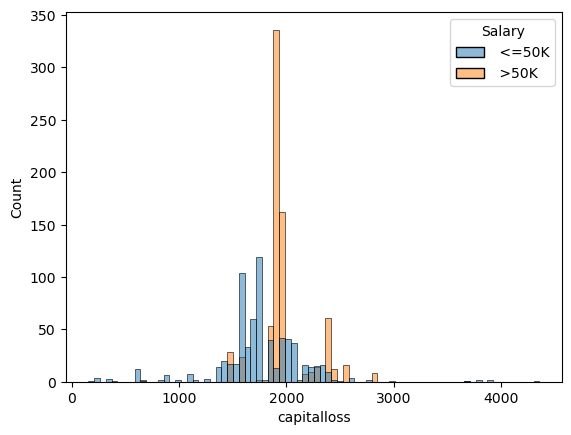

In [31]:
# Histogram for capitalloss greater than 0 for both values of Salary
sns.histplot(train[train.capitalloss > 0], x = 'capitalloss', hue = 'Salary')

Most records have no capital loss. Few records show capital loss in the 1000 to 3000 range. Applying log transformation will have the same result as capitalgain and hence not worth it

<Axes: ylabel='Frequency'>

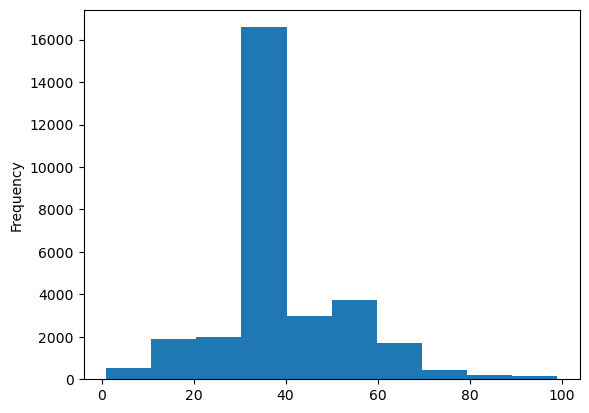

In [32]:
# Histogram for hoursperweek
train.hoursperweek.plot(kind = 'hist')

<Axes: xlabel='hoursperweek', ylabel='Count'>

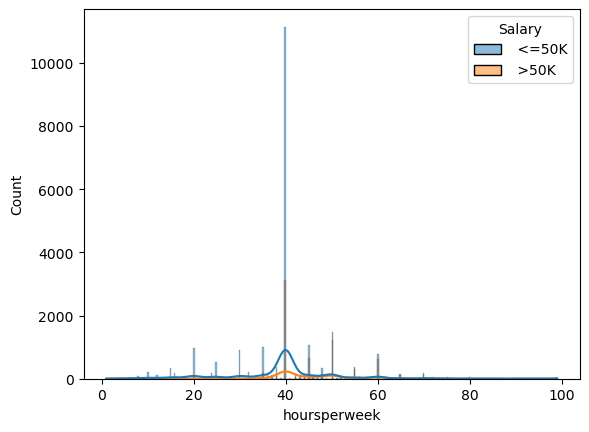

In [33]:
# Histogram for hoursperweek for both values of Salary
sns.histplot(train, x = 'hoursperweek', hue = 'Salary', kde = True)

Most records work 35 to 40 hours per week.

In [34]:
# Value counts for native
train.native.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

<Axes: xlabel='count', ylabel='native'>

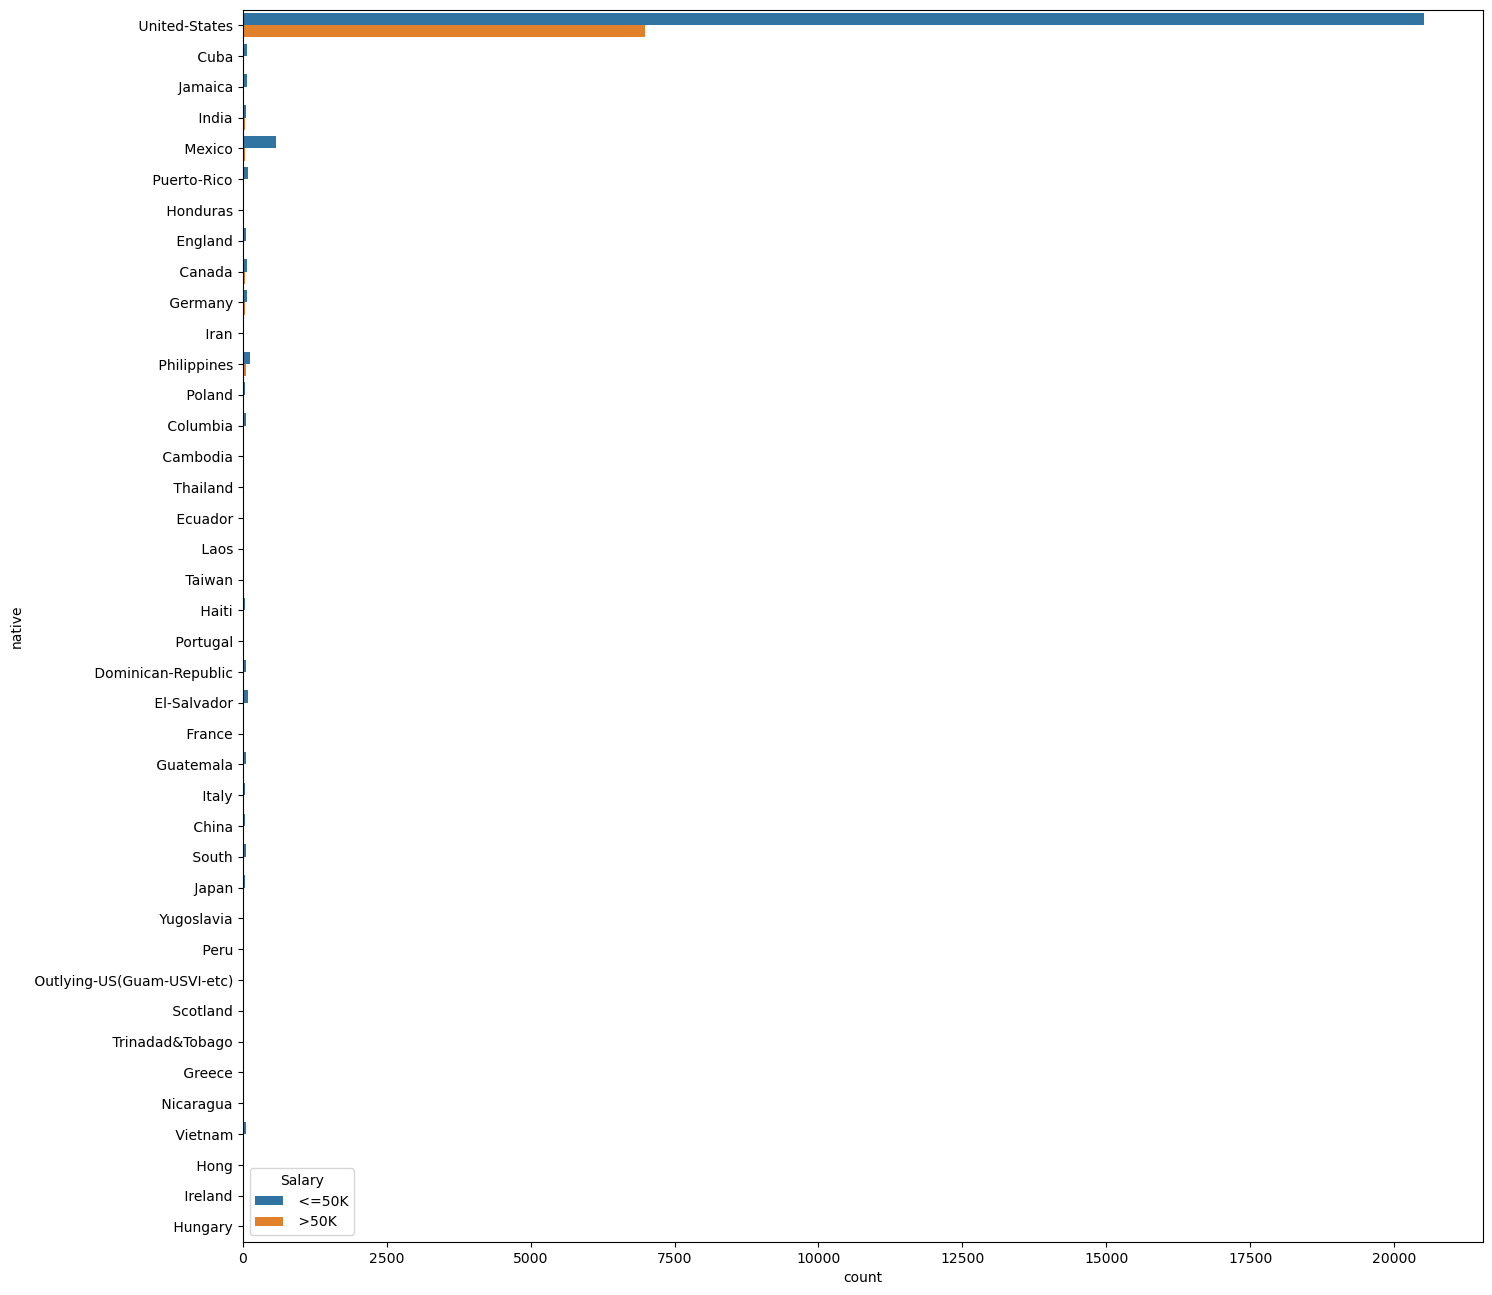

In [35]:
# Countplot for native for both values of Salary
plt.figure(figsize = (16,16))
sns.countplot(train, y = 'native', hue = 'Salary')

<Axes: xlabel='count', ylabel='native'>

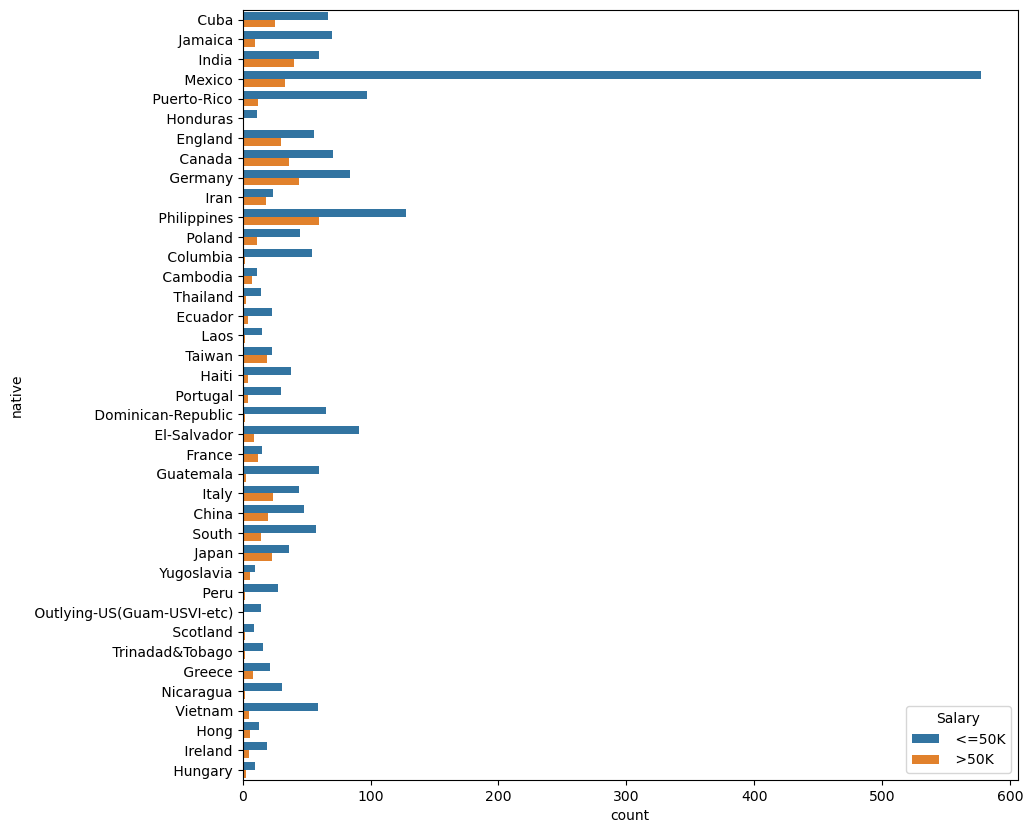

In [36]:
# Countplot for native except USA for both values of Salary
plt.figure(figsize = (10,10))
sns.countplot(train[train.native != ' United-States'], y = 'native', hue = 'Salary')

In [37]:
# Value counts for Salary
train.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [38]:
# Percent counts for Salary
train.Salary.value_counts(normalize=True)

 <=50K    0.751069
 >50K     0.248931
Name: Salary, dtype: float64

<Axes: xlabel='Salary', ylabel='count'>

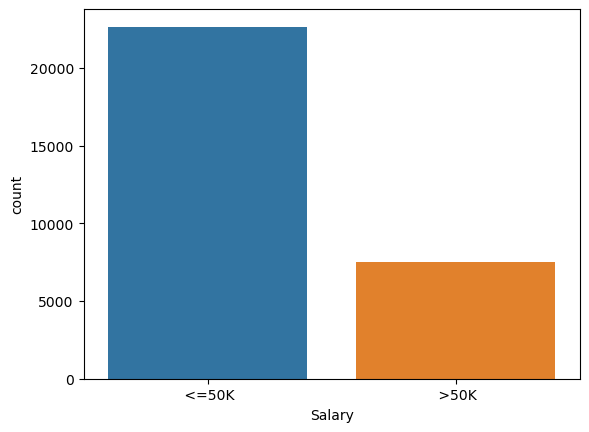

In [39]:
# Countplot for Salary
sns.countplot(train, x = 'Salary')

This is the dependent variable which has two classes indicating salary more than or upto 50 Thousand. The data is highly imbalanced as 75% data belongs to less than 50K salary category. Balancing the classes are not strictly necessary for Naive Bayes Classifiers as they use class weights as prior probabilities while computing probability of a sample falling into one of the target class

### Data Cleaning

We will remove educationno as it is a label encoding of education and can be generated if required

In [40]:
# Removing educationno feature
train.drop(columns = ['educationno'], inplace = True)
test.drop(columns = ['educationno'], inplace = True)

In [41]:
# Defining continuous features
continuous_features = ['age', 'capitalgain', 'capitalloss', 'hoursperweek']

In [42]:
# Checking unique values for workclass
train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [43]:
# Checking unique values for maritalstatus
train.maritalstatus.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [44]:
# Checking unique values for occupation
train.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

More than 1 categorical feature has a space before every value. We will strip them off:

In [45]:
train = train.applymap(lambda x : x.strip() if type(x) == str else x)
test = test.applymap(lambda x : x.strip() if type(x) == str else x)

In [46]:
# Binarizing dependent variable
train.Salary.replace({'<=50K':0, '>50K':1}, inplace = True)
test.Salary.replace({'<=50K':0, '>50K':1}, inplace = True)

## Model Training

GaussianNB is suitable for continuous data  
MultinomialNB for discrete data  
ComplementNB for imbalanced data  
CategoricalNB for categorical data

We have 4 continuous features and 8 categorical features. Salary is the dependent variable. We can discretize the continuous features and apply categorical naive bayes or one hot encode all categorical features and apply gaussian naive bayes. However, the assumption of gaussian naive bayes is that the distribution for each feature is gaussian or normal. However, 'capitalgain' and 'capitalloss' are not normal. Applying log transformations did not convert them to normal either, as there are a disproportionate number of 0 values for both features.

### For CategoricalNB

We can consider each unique value in the continuous features as a single category. However, a better strategy would be to use kmeans in KBinsDiscretizer to create groups based on distances. The number of group can be evaluated for each feature based on its distribution

In [47]:
# Creating copies of datasets for use with CategoricalNB
train_cat = train.copy()
test_cat = test.copy()

In [48]:
# Importing KBinsDiscretizer to convert continuous features into categorical
from sklearn.preprocessing import KBinsDiscretizer

For 'age', we will use 10 bins as the data is somewhat normally distributed and we want a larger number of groups

In [49]:
# Creating a binning object for 'age'
binner = KBinsDiscretizer(n_bins=10 , encode = 'ordinal', strategy='kmeans')

In [50]:
# Binning 'age' feature in both datasets
train_cat['age'] = binner.fit_transform(train_cat.age.to_numpy().reshape(-1,1))
test_cat['age'] = binner.transform(test_cat.age.to_numpy().reshape(-1,1))

For 'capitalgain', we will use a smaller number of bins as the majority of data is just 0 which will turn into one category, and we'll have some additional bins for the remaining sparse data

In [51]:
binner = KBinsDiscretizer(n_bins=5 , encode = 'ordinal', strategy='kmeans')

In [52]:
train_cat['capitalgain'] = binner.fit_transform(train_cat.capitalgain.to_numpy().reshape(-1,1))
test_cat['capitalgain'] = binner.transform(test_cat.capitalgain.to_numpy().reshape(-1,1))

For 'capitalloss', we will use a smaller number of bins as the majority of data is just 0 which will turn into one category, and we'll have some additional bins for the remaining sparse data

In [53]:
binner = KBinsDiscretizer(n_bins=5 , encode = 'ordinal', strategy='kmeans')

In [54]:
train_cat['capitalloss'] = binner.fit_transform(train_cat.capitalloss.to_numpy().reshape(-1,1))
test_cat['capitalloss'] = binner.transform(test_cat.capitalloss.to_numpy().reshape(-1,1))

For 'hoursperweek', we will use 10 bins as the data is somewhat normally distributed and we want a larger number of groups

In [55]:
binner = KBinsDiscretizer(n_bins=10 , encode = 'ordinal', strategy='kmeans')

In [56]:
train_cat['hoursperweek'] = binner.fit_transform(train_cat.hoursperweek.to_numpy().reshape(-1,1))
test_cat['hoursperweek'] = binner.transform(test_cat.hoursperweek.to_numpy().reshape(-1,1))

In [57]:
# Importing LabelEncoder to encode all categorical features into numerical values for modelling
from sklearn.preprocessing import LabelEncoder

In [58]:
# LabelEncoding each categorical feature in both datasets
for col in train_cat.columns:
    train_cat[col] = LabelEncoder().fit_transform(train_cat[col])
    test_cat[col] = LabelEncoder().fit_transform(test_cat[col])

In [59]:
# Separating independent and dependent features in both datasets
train_X = train_cat.drop(columns = 'Salary')
train_y = train_cat.Salary
test_X = test_cat.drop(columns = 'Salary')
test_y = test_cat.Salary

In [60]:
# Importing CategoricalNB classifier
from sklearn.naive_bayes import CategoricalNB

In [61]:
# Creating a model for Categorical Naive Bayes Classifier
cnb = CategoricalNB()

In [62]:
# Fitting the model to the training dataset
cnb.fit(train_X, train_y)

CategoricalNB()

In [63]:
# Getting Accuracy of the model for training data
cnb.score(train_X, train_y)

0.8125062166373794

In [64]:
# Getting Accuracy of the model for test data
cnb.score(test_X, test_y)

0.8144754316069057

Both training and testing data have very similar accuracy, which means we don't have over or under fitting

In [65]:
# Importing other metrics to evaluate the model's performance
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [66]:
# Printing classification report for training data for the model
print(classification_report(train_y, cnb.predict(train_X)))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     22653
           1       0.59      0.79      0.68      7508

    accuracy                           0.81     30161
   macro avg       0.76      0.80      0.77     30161
weighted avg       0.84      0.81      0.82     30161



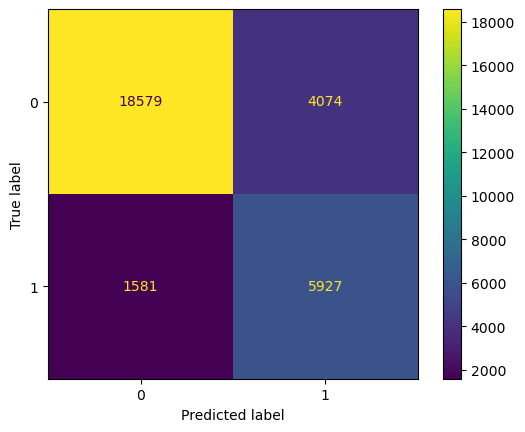

In [67]:
# Plotting the confusion matrix for training data for the model
ConfusionMatrixDisplay(confusion_matrix(train_y, cnb.predict(train_X))).plot()

Precision is low, which mean false positives are high. However, considering 3/4ths of the data is classified into class 0, high false positive value is expected

In [68]:
# Printing classification report for test data for the model
print(classification_report(test_y, cnb.predict(test_X)))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     11360
           1       0.59      0.79      0.68      3700

    accuracy                           0.81     15060
   macro avg       0.76      0.81      0.77     15060
weighted avg       0.84      0.81      0.82     15060



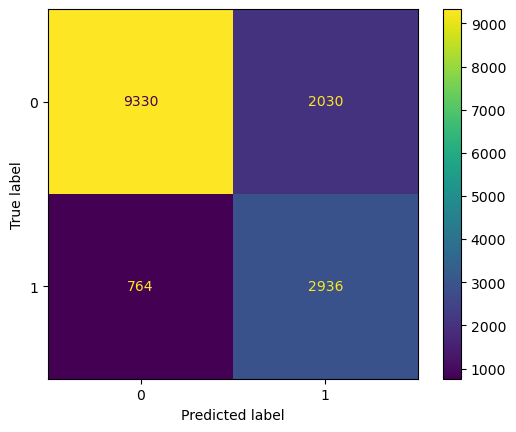

In [69]:
# Plotting confusion matrix for test data for the model
ConfusionMatrixDisplay(confusion_matrix(test_y, cnb.predict(test_X))).plot()

Precision is again low for test data, indicating high false positives

In [70]:
# Importing function to balance target classes
from imblearn.combine import SMOTEENN

SMOTEENN uses a combination of over and undersampling to balance target classes, and performs better than its alternative SMOTETomek

In [71]:
# Balancing training data
train_X, train_y = SMOTEENN().fit_resample(train_X, train_y)

In [72]:
# Fitting balanced training data to the model
cnb.fit(train_X, train_y)

CategoricalNB()

In [73]:
# Accuracy for balanced training data
cnb.score(train_X, train_y)

0.9085465239883779

In [74]:
# Accuracy for unbalanced testing data
cnb.score(test_X, test_y)

0.7793492695883134

In [75]:
# Printing classification report for test data for the model fitted with balanced target classes
print(classification_report(test_y, cnb.predict(test_X)))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84     11360
           1       0.53      0.88      0.66      3700

    accuracy                           0.78     15060
   macro avg       0.74      0.81      0.75     15060
weighted avg       0.85      0.78      0.79     15060



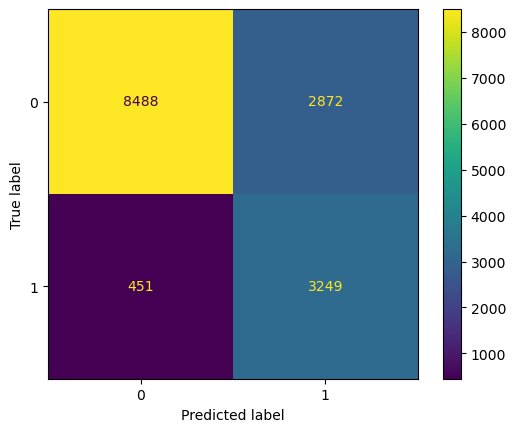

In [76]:
# Plotting confusion matrix for test data for the model fitted with balanced target classes
ConfusionMatrixDisplay(confusion_matrix(test_y, cnb.predict(test_X))).plot()

The model fitted with balanced training data performs worse on the testing data as it has an even lower precision score, indicating high amount of false positives. Hence, we will discard using balanced datasets for CategoricalNB

### For GaussianNB

We convert every categorical feature into dummies

In [77]:
# Creating copies of both datasets for use with Gaussian Naive Bayes Classifier
train_g = train.copy()
test_g = test.copy()

In [78]:
# Defining the categorical features
categorical_features = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']

In [79]:
# Creating dummies for both datasets
train_g = pd.get_dummies(train_g, columns=categorical_features)
test_g = pd.get_dummies(test_g, columns=categorical_features)

In [80]:
# Seperating independent and dependent features for both datasets
train_X = train_g.drop(columns = 'Salary')
train_y = train_g.Salary
test_X = test_g.drop(columns = 'Salary')
test_y = test_g.Salary

In [81]:
# Importing GaussianNB model
from sklearn.naive_bayes import GaussianNB

In [82]:
# Creating model object
gnb = GaussianNB()

In [83]:
# Fitting training data to the model
gnb.fit(train_X, train_y)

GaussianNB()

In [84]:
# Getting Accuracy for the training data
gnb.score(train_X, train_y)

0.7924472000265244

In [85]:
# Getting Accuracy for the test data
gnb.score(test_X, test_y)

0.7918326693227091

Both score are similar. Hence, we can conclude that there is no over or under fitting. However, we have lower accuracy than CategoricalNB

In [86]:
# Printing classification report for training data
print(classification_report(train_y, gnb.predict(train_X)))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     22653
           1       0.56      0.82      0.66      7508

    accuracy                           0.79     30161
   macro avg       0.74      0.80      0.76     30161
weighted avg       0.84      0.79      0.80     30161



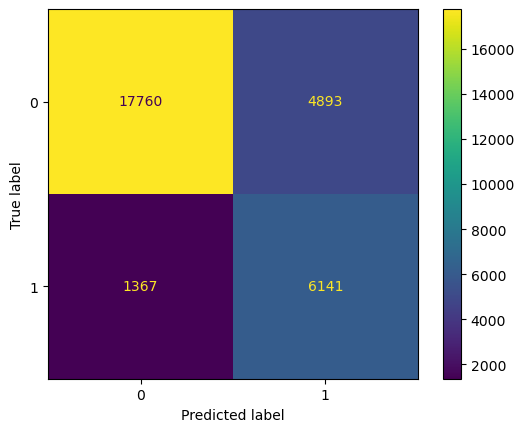

In [87]:
# Plotting confusion matrix for training data
ConfusionMatrixDisplay(confusion_matrix(train_y, gnb.predict(train_X))).plot()

In [88]:
# Printing classification report for test data
print(classification_report(test_y, gnb.predict(test_X)))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     11360
           1       0.55      0.82      0.66      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.80      0.75     15060
weighted avg       0.84      0.79      0.80     15060



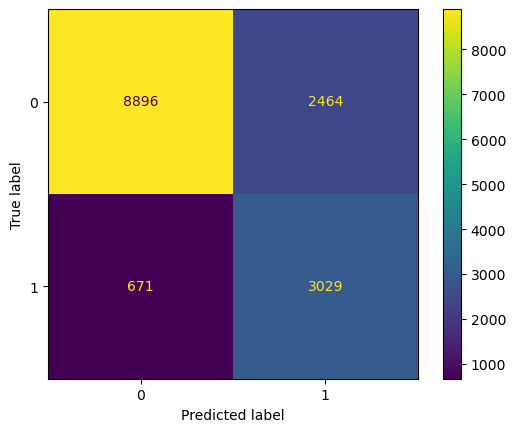

In [89]:
# Plotting confusion matrix for testb data
ConfusionMatrixDisplay(confusion_matrix(test_y, gnb.predict(test_X))).plot()

Here we have yet lower precision than CategoricalNB

In [90]:
# Balancing training data
train_X, train_y = SMOTEENN().fit_resample(train_X, train_y)

In [91]:
# Fitting model to balanced training data
gnb.fit(train_X, train_y)

GaussianNB()

In [92]:
# Accuracy for balanced training data
gnb.score(train_X, train_y)

0.8947003496925118

In [93]:
# Accuracy for test data for model fitted with balanced training data
gnb.score(test_X, test_y)

0.7227091633466135

In [94]:
# Printing classification report for test data for model with balanced training data
print(classification_report(test_y, gnb.predict(test_X)))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78     11360
           1       0.47      0.90      0.61      3700

    accuracy                           0.72     15060
   macro avg       0.71      0.78      0.70     15060
weighted avg       0.83      0.72      0.74     15060



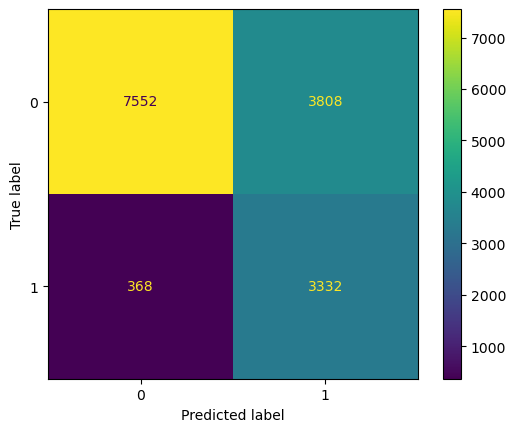

In [95]:
# Plotting confusion matrix for test data for model with balanced training data
ConfusionMatrixDisplay(confusion_matrix(test_y, gnb.predict(test_X))).plot()

While the False Negatives are very low, The False Positives are quite high, higher than other models

## Conclusion

- Balancing target classes for model building does not greatly improve performance for Naive Bayes Classifiers
- Categorical Naive Bayes Classifier provided the best precision score
- Gaussian Naive Bayes Classifier with balanced training data improved Recall but reduced Precision significantly more than other models